In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle 

df= pd.read_csv('C:\\Users\\chiraz\Downloads\\archive\\train.csv')
df
df.info()

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
C:\Users\chiraz\AppData\Local\Temp\ipykernel_18084\1395100726.py:13: SyntaxWarning: invalid escape sequence '\D'
  df= pd.read_csv('C:\\Users\\chiraz\Downloads\\archive\\train.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# renseigner les valeurs manquantes
cat_data= []
num_data= []
for i,c in enumerate(df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])
# enregistrer dans une dataframe , transpose pour renverser les colonnes 
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()





In [5]:
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [6]:
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()

C:\Users\chiraz\AppData\Local\Temp\ipykernel_18084\3234384135.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill',inplace=True)


False

In [7]:
#transformer la colonne target
target_value={'Y':1, 'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)
target=target.map(target_value)
target


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [8]:
#remplacer les valeurs categoriques par valeurs numeriques 0,1 ..
le=LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data    

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [ ]:
#supprimer loanid
cat_data.drop('Loan_ID', axis=1, inplace=True)

In [10]:
#concatener cat data et num data et specifier target
x=pd.concat([cat_data, num_data], axis=1)
y=target
y 

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [11]:
#commencer par target
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [12]:
#la bd utilisées pour EDA
df=pd.concat([cat_data,  num_data, target],axis=1)

le pourcentage des credits accordés est : 0.3127035830618892
le pourcentage des credits non accordés est : 0.6872964169381107


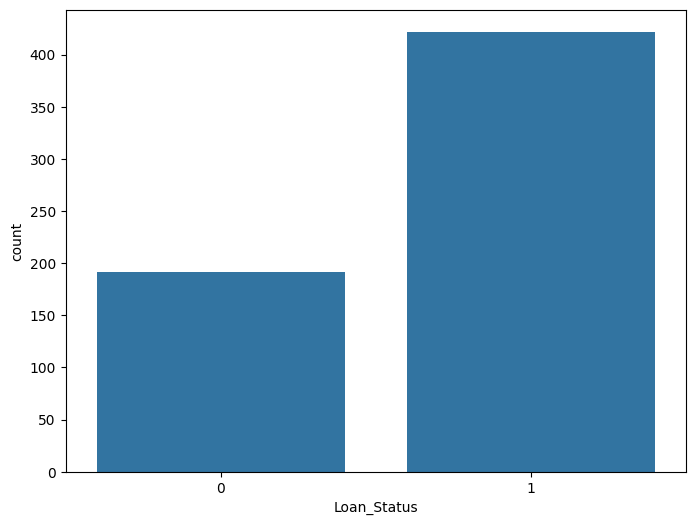

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x=target)
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print(f'le pourcentage des credits accordés est : {yes}')
print(f'le pourcentage des credits non accordés est : {no}')

C:\Users\chiraz\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


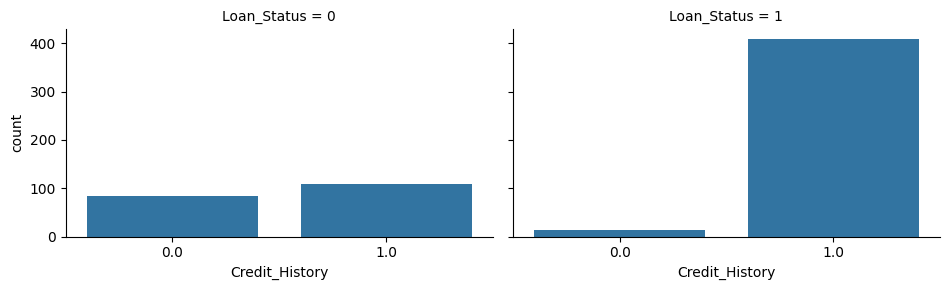

In [ ]:
#l'impact : 1 credit history
grid=sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot,'Credit_History')

C:\Users\chiraz\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


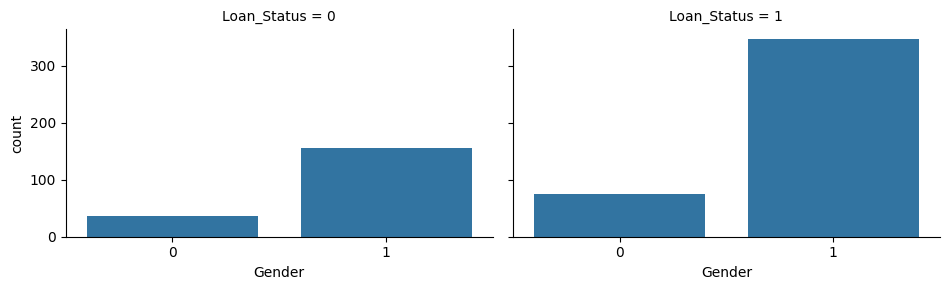

In [15]:
#l'impact  : sexe
grid=sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot,'Gender')

C:\Users\chiraz\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


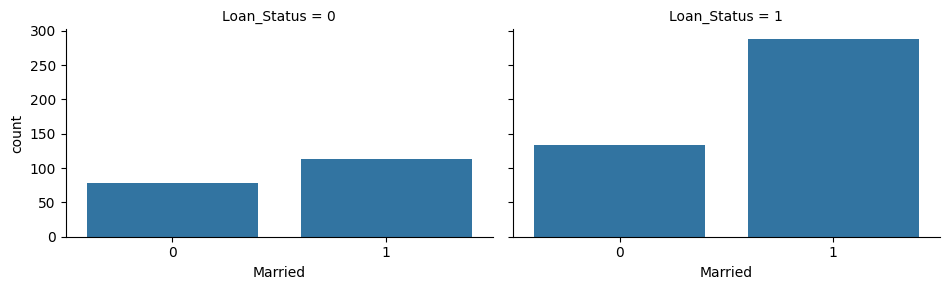

In [16]:
#l'impact : situations
grid=sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot,'Married')

C:\Users\chiraz\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


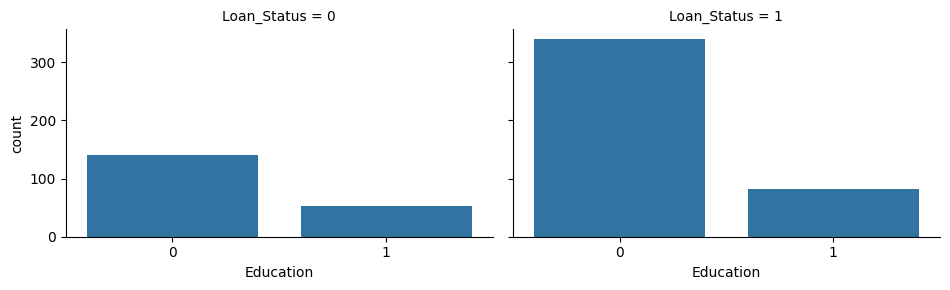

In [17]:
#l'impact : education
grid=sns.FacetGrid(df,col='Loan_Status', aspect=1.6)
grid.map(sns.countplot,'Education')

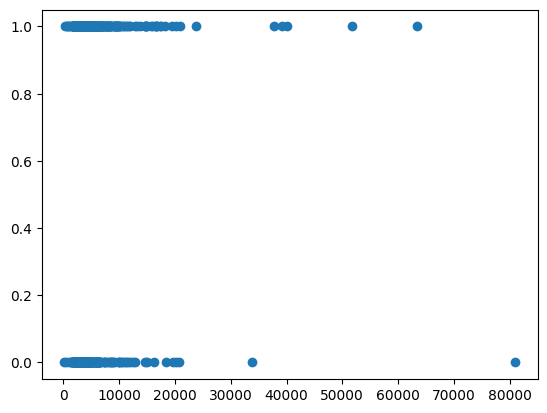

In [18]:
#revenu du demandeur
plt.scatter(df['ApplicantIncome'], df['Loan_Status'])
# pas de bon impact qui revenu sur les credits acceptées 

In [19]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


In [20]:
#devisier la bd en une bd test et d'entrainement
div=StratifiedShuffleSplit(n_splits=1 ,test_size=0.2, random_state=42)
for train,test in div.split(x,y):
    X_train,X_test = x.iloc[train],x.iloc[test]
    Y_train,Y_test = y.iloc[train],y.iloc[test]

print('X_train taille:', X_train.shape)
print('X_test taille:', X_test.shape)
print('Y_train taille:', Y_train.shape)
print('Y_test taille:', Y_test.shape)

     

X_train taille: (491, 11)
X_test taille: (123, 11)
Y_train taille: (491,)
Y_test taille: (123,)


In [ ]:
#on va appliquer tois algo logistic regression, knn , decisiontree
models={
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1,random_state=42) 
}
# la fonction de precision
def accu(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'la precision du modele est : {acc}')

# c'est la fonction d'application des modeles
def train_test_eval (models, X_train,Y_train,X_test, Y_test_test):
    for name,model in models.items():
        print(name, ':')
        model.fit(X_train,Y_train)
        accu(Y_test, model.predict(X_test))
        print('-'*30)

train_test_eval(models,  X_train,Y_train,X_test, Y_test )        


LogisticRegression :
la precision du modele est : 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision du modele est : 0.6504065040650406
------------------------------
DecisionTreeClassifier :
la precision du modele est : 0.8455284552845529
------------------------------


C:\Users\chiraz\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
x2=x[['Credit_History','Married','CoapplicantIncome']]
# nouvelle variable 

In [ ]:
#devisier la bd en une bd test et d'entrainement
div=StratifiedShuffleSplit(n_splits=1 ,test_size=0.2, random_state=42)
for train,test in div.split(x2,y):
    X_train,X_test = x2.iloc[train],x2.iloc[test]
    Y_train,Y_test = y.iloc[train],y.iloc[test]

print('X_train taille:', X_train.shape)
print('X_test taille:', X_test.shape)
print('Y_train taille:', Y_train.shape)
print('Y_test taille:', Y_test.shape)
# nouvelle modele pour x2

X_train taille: (491, 3)
X_test taille: (123, 3)
Y_train taille: (491,)
Y_test taille: (123,)


In [24]:
train_test_eval(models,  X_train,Y_train,X_test, Y_test )   

LogisticRegression :
la precision du modele est : 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision du modele est : 0.6991869918699187
------------------------------
DecisionTreeClassifier :
la precision du modele est : 0.8455284552845529
------------------------------


In [25]:
#appliquer la regression logistique sur notre base donnee
Classifier=LogisticRegression()
Classifier.fit(x2,y)

LogisticRegression()

In [26]:
#enregistrer le modele
pickle.dump(Classifier,open('model.pkl','wb'))